In [1]:
import torch, os, mlflow
import matplotlib.pyplot as plt, numpy as np
from mlflow_helper import load_attack_results, load_from_db
from itertools import chain

In [29]:
flat_28x28_baseline_run_names = [1697206030, 1697206644, 1697207683, 1697209477, 1697210525, 1697213123,
                                 1697215830, 1697217421, 1697217912, 1697220416, 1697221465, 1697224525,
                                 1697226035, 1697226722, 1697228695, 1697229854, 1697231110, 1697236373]

# flat_28x28_MLP_run_names = [1697263106, 1697264117, 1697264852, 1697266762, 1697267108, 1697269780, 1697270716,
#                             1697271049, 1697271795, 1697274594, 1697275265, 1697278699, 1697282534, 1697282725,
#                             1697283628, 1697285267, 1697286841, 1697289516, 1697291360, 1697291756, 1697292309,
#                             1697293673, 1697296087, 1697297687, 1697298663, 1697299099, 1697300189, 1697301644,
#                             1697303700, 1697304939]


flat_28x28_MLP_run_names = [1697263106]

In [26]:
# flat_28x28_baseline_images = []
# flat_28x28_baseline_preds = []
# flat_28x28_baseline_clean_preds = []

# for run_name in flat_28x28_baseline_run_names:
#     flat_28x28_baseline_images_, flat_28x28_baseline_preds_, flat_28x28_baseline_clean_preds_, labels = load_attack_results(run_name, 'LinfDeepFoolAttack', 'images.pickle')
#     flat_28x28_baseline_images.append(flat_28x28_baseline_images_)
#     flat_28x28_baseline_preds.append(flat_28x28_baseline_preds_)
#     flat_28x28_baseline_clean_preds.append(flat_28x28_baseline_clean_preds_)

flat_28x28_baseline_success_rate = [load_attack_results(run_name, 'LinfDeepFoolAttack', 'success_rate.pickle') for run_name in flat_28x28_baseline_run_names]
flat_28x28_baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_baseline_run_names]
flat_28x28_baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_baseline_run_names]
flat_28x28_baseline_params = load_attack_results(flat_28x28_baseline_run_names[0], 'LinfDeepFoolAttack', 'params.pickle')
# flat_28x28_baseline_success = torch.stack([load_attack_results(run_name, 'LinfDeepFoolAttack', 'success.pickle') for run_name in flat_28x28_baseline_run_names])
# flat_28x28_baseline_logits = torch.stack([load_attack_results(run_name, 'LinfDeepFoolAttack', 'logits.pickle') for run_name in flat_28x28_baseline_run_names])

In [30]:
flat_28x28_MLP_success_rate = [load_attack_results(run_name, 'LinfDeepFoolAttack', 'success_rate.pickle') for run_name in flat_28x28_MLP_run_names]
flat_28x28_MLP_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_MLP_run_names]
flat_28x28_MLP_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_MLP_run_names]
flat_28x28_MLP_params = load_attack_results(flat_28x28_MLP_run_names[0], 'LinfDeepFoolAttack', 'params.pickle')

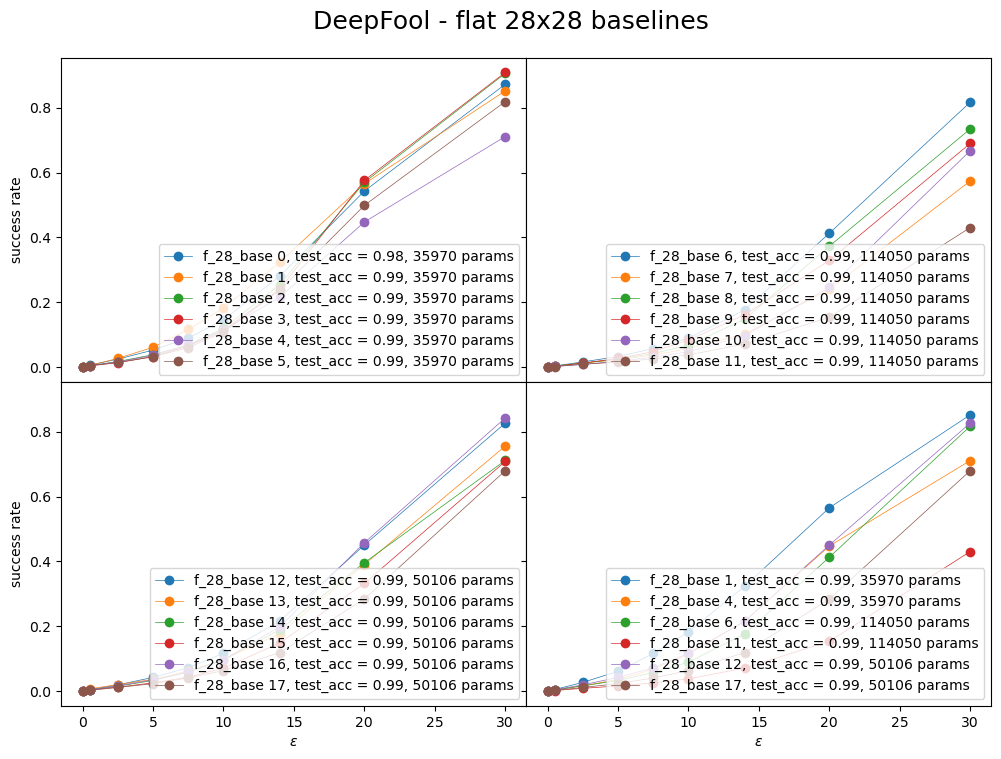

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('DeepFool - flat 28x28 baselines', fontsize=18)
plt.subplots_adjust(top=0.92)

# for i in [0]:
#     axs[0,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")

for i in range(6):
    axs[0,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")

for i in range(6,12):
    axs[0,1].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")
    
for i in range(12,18):
    axs[1,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")
    
for i in [1,4,6,11,12,17]:
    axs[1,1].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")

for j in range(2):
    for k in range(2):
        axs[j,k].legend(loc='lower right')
    axs[1,j].set_xlabel('$\epsilon$')
    axs[j,0].set_ylabel('success rate')
# plt.savefig('DeepFool_flat_28x28_baseline.pdf', bbox_inches="tight")
plt.show()

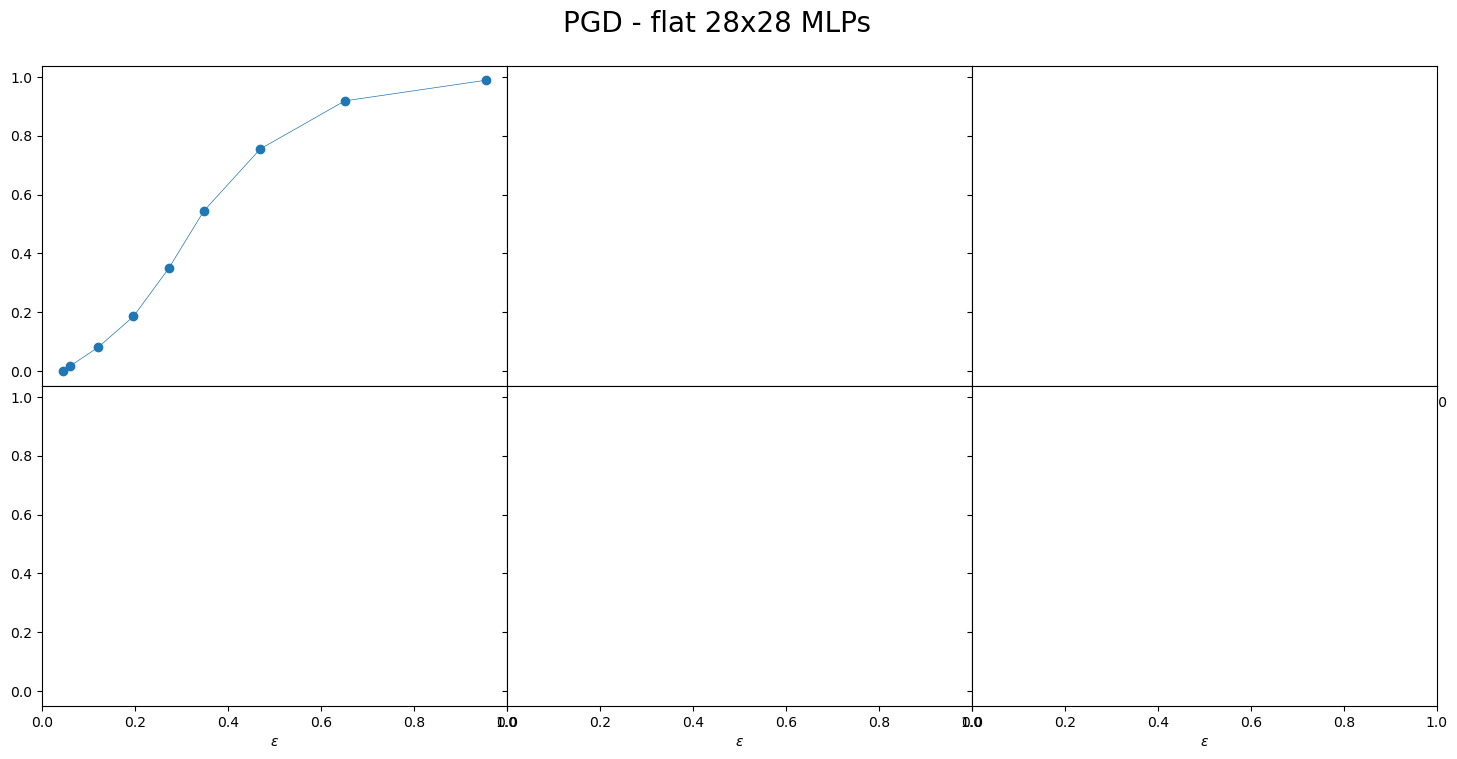

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (18, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 MLPs', fontsize=20)
plt.subplots_adjust(top=0.91)

for i in [0]:
    axs[0,0].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
# for i in range(6):
#     axs[0,0].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
# for i in range(6,12):
#     axs[0,1].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")

# for i in range(12,18):
#     axs[0,2].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
# for i in range(18,24):
#     axs[1,0].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
# for i in range(24,30):
#     axs[1,1].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
# for i in [0,4,6,10,12,15,18,23,27,24]:
#     axs[1,2].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")

# for j in range(2):
#     axs[j,0].set_ylabel('success rate')
#     for k in range(3):
#         axs[j,k].legend(loc='lower right')
        
for k in range(3):
    axs[1,k].set_xlabel('$\epsilon$')
    
# plt.savefig('DeepFool_flat_28x28_MLP.pdf', bbox_inches="tight")
plt.show()

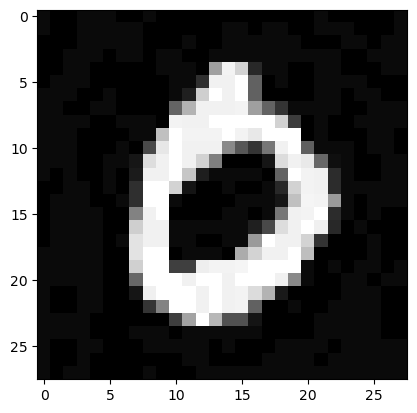

In [20]:
# plt.imshow(flat_28x28_baseline_images[0][5,0,0], cmap='gray')
# plt.show()

# print(flat_28x28_baseline_logits.size())
# print(flat_28x28_baseline_clean_preds)
# print(flat_28x28_baseline_preds)
# print(flat_28x28_baseline_success.size())
# print(flat_28x28_baseline_params)